In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
path = r"Datasets"

coe = np.genfromtxt(path + "\coe-results.csv", delimiter=",", skip_header = 1,
                    dtype = [("month", "U7"), 
                              ("bidding_no", "U100"), 
                              ("vehicle_class", "U100"),
                              ("quota", "U100"),
                              ("bids_success", "U100"),
                              ("bids_received", "U100"),
                              ("premium", "U100")])

registration = np.genfromtxt(path + "\\new-registration-of-cars-by-make.csv", delimiter=",", skip_header = 1,
                             dtype = [("month", "U7"), 
                              ("make", "U100"), 
                              ("fuel_type", "U100"),
                              ("vehicle_type", "U100"),
                              ("number", "U100")])

travel = np.genfromtxt(path + "\\average-annual-kilometres-travelled-per-vehicle.csv",delimiter=",",  skip_header = 1,
                       dtype = [("year", "U4"), 
                              ("vehicle_type", "U100"),
                              ("average_annual_mileage", "U100")])

# Graph 1: Price Difference Between The Months In 2 Specified Years

In [3]:
#Function to generate the data for 2 years by Category 
def Category(year):
    bid_A = []
    bid_B = []
    bid_C = []
    bid_D = []
    bid_E = []
    for i in range(len(coe['month'])):
        if coe['month'][i].startswith(year) and coe['bidding_no'][i] == "1":
            if coe['vehicle_class'][i] == "Category A":
                bid_A.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category B":
                bid_B.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category C":
                bid_C.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category D":
                bid_D.append(int(coe['premium'][i]))
            elif coe['vehicle_class'][i] == "Category E":
                bid_E.append(int(coe['premium'][i]))
    return [bid_A, bid_B, bid_C, bid_D, bid_E]

In [4]:
#Choosing the years to be visualised 
year1 = input("Please input the year1: ")
year2 = input("Please input the year2: ")

categories_1 = Category(year1)
# print(categories_1)

categories_2 = Category(year2)
# print(categories_2)

Please input the year1: 2017
Please input the year2: 2018


In [5]:
# Calculation of the difference for the respective years

#Year 1
cata_diff_1 = []

for i in range(len(categories_1[0])):
    if i == len(categories_1[0])-1:
        break
    else:
        cata_diff_1.append(categories_1[0][i] - categories_1[0][i +1])
    
# print(cata_diff_1)


#Year 2
cata_diff_2 = []

for i in range(len(categories_2[0])):
    if i == len(categories_2[0])-1:
        break
    else:
        cata_diff_2.append(categories_2[0][i] - categories_2[0][i +1])
    
# print(cata_diff_2)


In [6]:
# Formatting of data in months

months = ["Jan-Feb", "Feb-Mar", "Mar-Apr", "Apr-May", "May-Jun", "Jun-Jul", "Jul-Aug", "Aug-Sep", "Sep-Oct", "Oct-Nov", "Nov-Dec"]

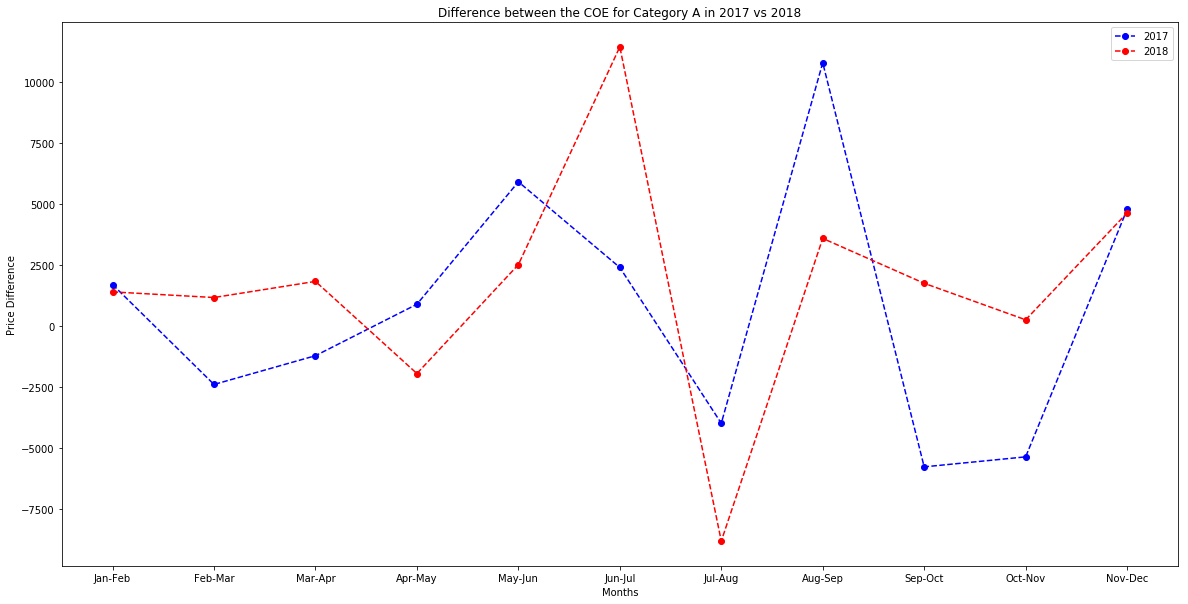

In [95]:
fig,ax = plt.subplots(figsize=(20,10))

ax.plot(months, cata_diff_1, 'bo--', label = year1)
ax.plot(months, cata_diff_2, 'ro--', label = year2)
ax.set_title("Difference between the COE for Category A in {} vs {}".format(year1, year2))
ax.set_xlabel('Months')
ax.set_ylabel('Price Difference')

# plt.title = "Difference between the COE for Category A in {} vs {}".format(year1, year2)

plt.legend(loc='upper right')
plt.show()

# Graph 2: Difference In The Types Of Vehicles Being Made In 2 Specified Years

In [57]:
def Fuel(year):
    fuel = []
    for i in range(len(registration['month'])):
        if registration['month'][i].startswith(year):
#             print(registration['month'][i])
            fuel.append(registration['fuel_type'][i])
    return fuel

In [130]:
fuel_1 = Fuel(year1)
fuel_2 = Fuel(year2)

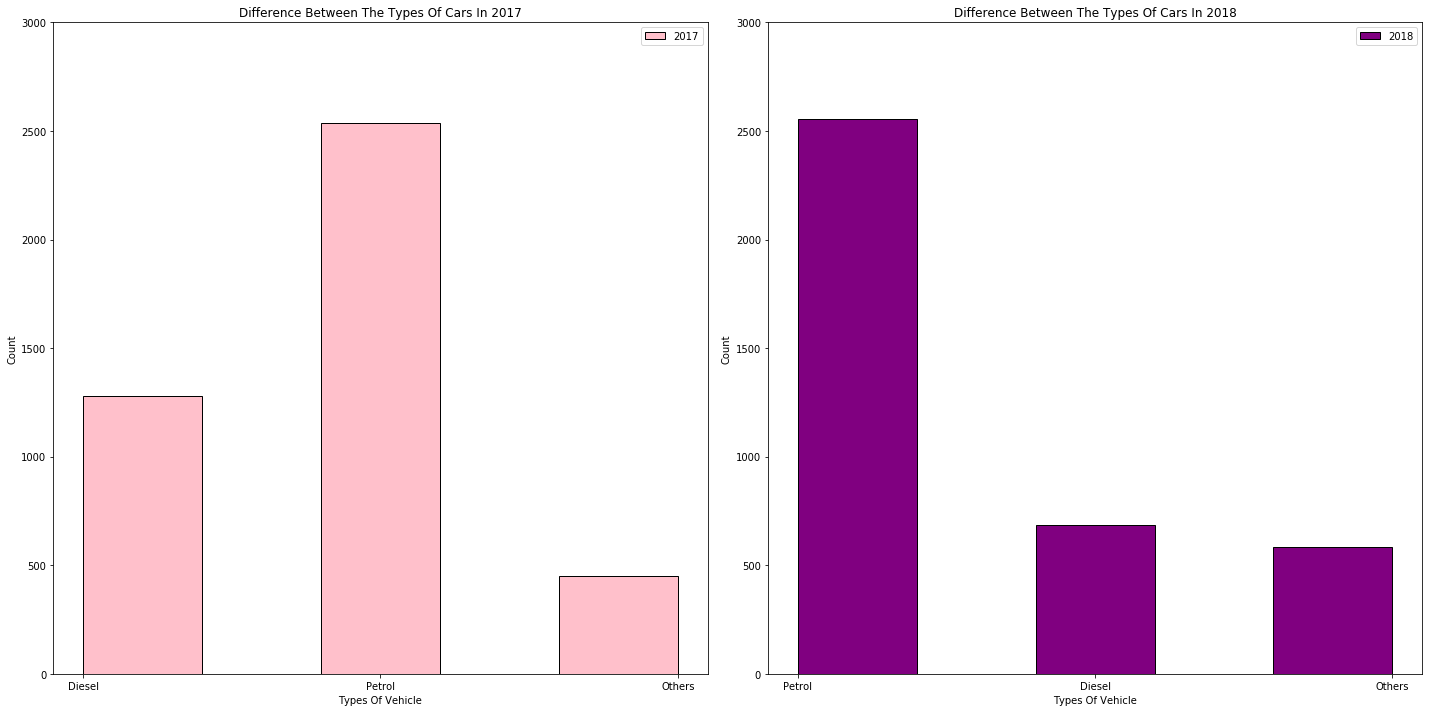

In [142]:
fig, ax = plt.subplots(1, 2, figsize=(20,10), tight_layout = True)


plt.setp(ax, ylim = (0, 3000))

ax[0].hist(fuel_1, color = 'pink', bins = 5, edgecolor = 'black', label = year1)
ax[0].set_title("Difference Between The Types Of Cars In {}".format(year1))
ax[0].set_xlabel('Types Of Vehicle')
ax[0].set_ylabel('Count')
ax[0].legend(loc = 'upper right')


ax[1].hist(fuel_2, color = 'purple', bins = 5, edgecolor = 'black', label = year2)
ax[1].set_title("Difference Between The Types Of Cars In {}".format(year2))
ax[1].set_xlabel('Types Of Vehicle')
ax[1].set_ylabel('Count')
ax[1].legend(loc = 'upper right')


plt.show()

In [181]:
def Fuel_Print(year, list):
    petrol = 0
    diesel = 0
    others = 0
    for type in list:
        if type == "Petrol":
            petrol += 1
        elif type == "Diesel":
            diesel += 1
        elif type == "Others":
            others += 1
    print("In {}, there were a total of {} cars, of which {} cars that were using Petrol, {} using Diesel and {} using Others."
         .format(year, len(list), petrol, diesel, others))
    return [petrol, diesel, others]


print("*"*125)
fp1 = Fuel_Print(year1, fuel_1)
print("\n")
fp2 = Fuel_Print(year2, fuel_2)



print("*"*125)
print("\nIn {}, there was a decrease of {} cars in total".format(year2, (fp2[0] - fp1[0])))
print("\n")
print("Increase of {} cars that were using Petrol".format((fp2[0] - fp1[0])))
print("Decrease of {} cars that were using Diesel".format((fp1[1] - fp2[1])))
print("Increase of {} cars that were using Others".format((fp2[2] - fp1[2])))

*****************************************************************************************************************************
In 2017 there were a total of 4265 cars, of which 2535 cars that were using Petrol, 1280 using Diesel and 450 using Others.


In 2018 there were a total of 3825 cars, of which 2555 cars that were using Petrol, 685 using Diesel and 585 using Others.
*****************************************************************************************************************************

In 2018, there was a decrease of 20 cars in total


Increase of 20 cars that were using Petrol
Decrease of 595 cars that were using Diesel
Increase of 135 cars that were using Others
